GREAT: data inspection (python)
================
* **Aim**: Load GREAT spectrum and complete basic baseline subtraction. <br />
* **Data**: Level 3 data. <br />
* **Tools**: astropy <br />
* **Instrument**: GREAT <br />
* **Documentation**: [GREAT observer's handbook](https://www.sofia.usra.edu/instruments/great)
* **Notebook repository**: https://github.com/SOFIAObservatory/Recipes

Goals
-------
* Inspect GREAT data structure
* Plot GREAT spectrum
* Subtract baseline of spectrum

Introduction
--------------

This recipe is a beginner's introduction to plotting GREAT spectra using python. Code contribution by Kyle Kaplan.

Ingredients
---------------

Data can be downloaded directly [**here**](), or downloaded from the [IRSA archive](https://irsa.ipac.caltech.edu/Missions/sofia.html).


In [1]:
#Generate a cleaned 2D fits image from the datacube
from astropy.io import fits
import numpy as np
 
hdul = fits.open('../example_data/GREAT/FEEDBACK_RCW120_CII.lmv.fits') #Read datacube
data3d = hdul[0].data  #Generate a cleaned 2D image

In [2]:
hdul[0].data.shape

(1000, 143, 143)

The shape of the Level 4 GREAT data is 1000 sequential 2D arrays of shape 143 X 143.

In [3]:
hdul[0].header[0:20]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    3 / number of array dimensions                     
NAXIS1  =                  143                                                  
NAXIS2  =                  143                                                  
NAXIS3  =                 1000                                                  
DATAMIN = -0.4854714202881E+02         /                                        
DATAMAX =  0.2126931915283E+03         /                                        
BUNIT   = 'K (Tmb)     '               /                                        
CTYPE1  = 'RA---GLS    '               /                                        
CRVAL1  =  0.2580152100000E+03         /                                        
CDELT1  = -0.1958333295930E-02         /                                        
CRPIX1  =  0.1061760874119E+

Plot image cube slice
-------------

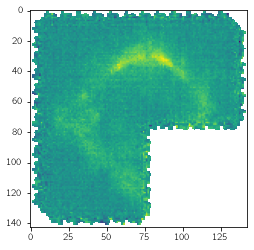

In [4]:
plt.imshow(hdul[0].data[500]);

In [5]:
# plot interactive image
from ipywidgets import interactive

def f(image_slice):
    plt.figure()
    plt.imshow(hdul[0].data[image_slice]);
    plt.show()

interactive_plot = interactive(f, image_slice=(450, 550, 2))
output = interactive_plot.children[-1]
# output.layout.height = '1000px'
interactive_plot

interactive(children=(IntSlider(value=500, description='image_slice', max=550, min=450, step=2), Output()), _d…